In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Load data
df = pd.read_csv("../datasets/ames.csv")

In [2]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

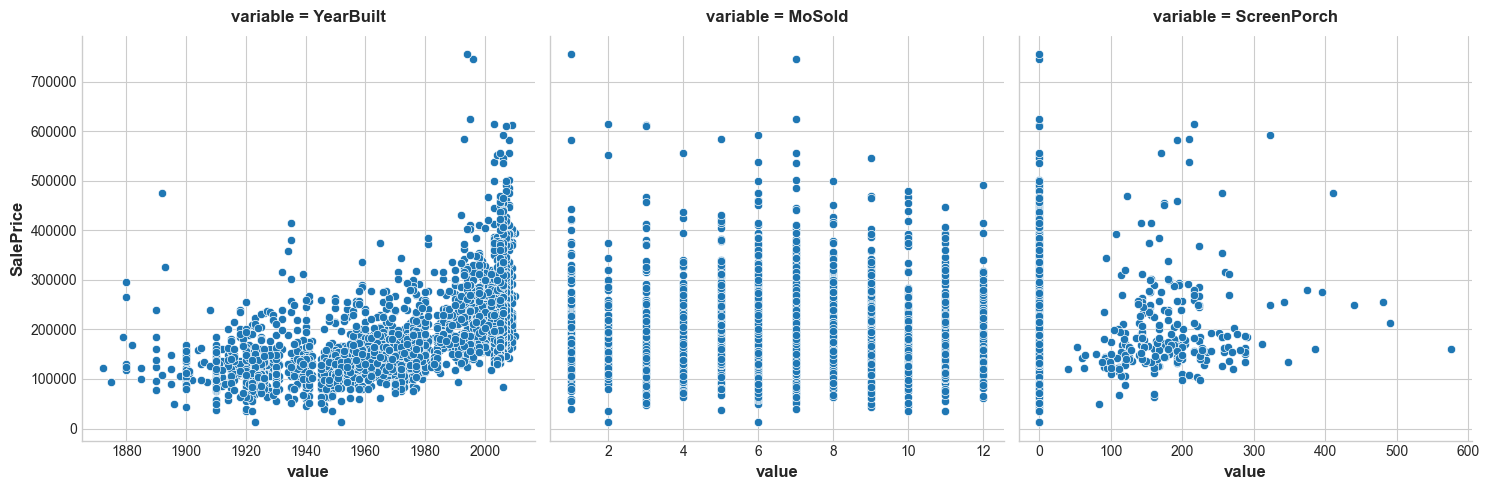

In [3]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
    )

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


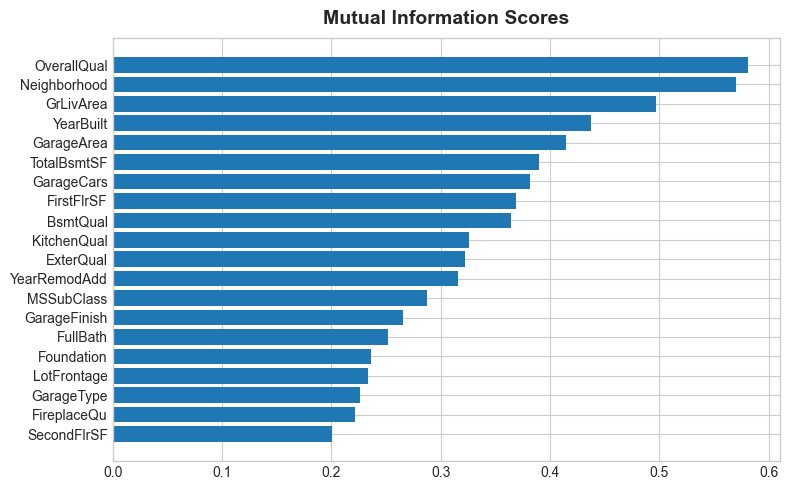

In [4]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

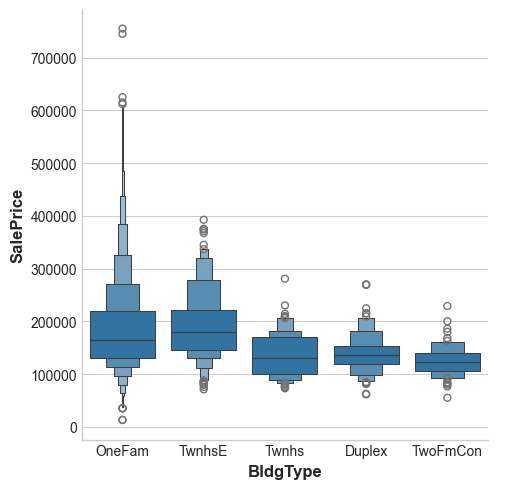

In [5]:
# Boxen plot for BldgType vs SalePrice
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen")

看起來像是 BldgType 對 SalePrice 影響程度不大
在本步驟中，研究「建築類型」特徵可能產生的互動效應。該特徵透過五個類別描述了住宅的整體結構：

BldgType：住宅類型  
- **1Fam**: 獨棟別墅  
- **2FmCon**: 雙戶改建；最初為獨棟別墅  
- **Duplx**: 複式公寓  
- **TwnhsE**: 聯排別墅末端單元  
- **TwnhsI**: 聯排別墅內部單元  

「建築類型」特徵的 MI 得分並不高。
圖表證實了「建築類型」中的類別在區分「銷售價格」值方面表現不佳（換句話說，分佈看起來相當相似）：

但是直覺上，「建築類型」應該會與售價有關，接下來看看其他特徵
（例如 GrLivArea - Above ground living area, MoSold - Month sold)
如何互相影響，從而影響「銷售價格」。

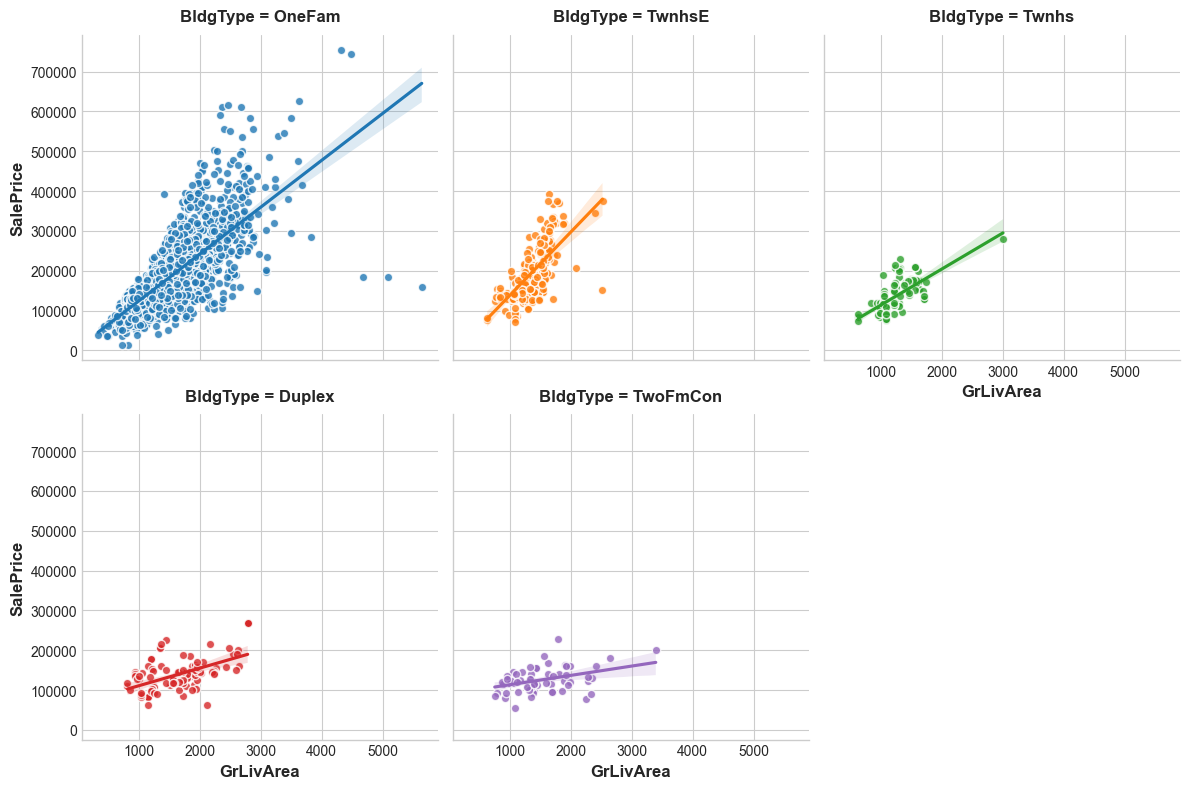

In [6]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

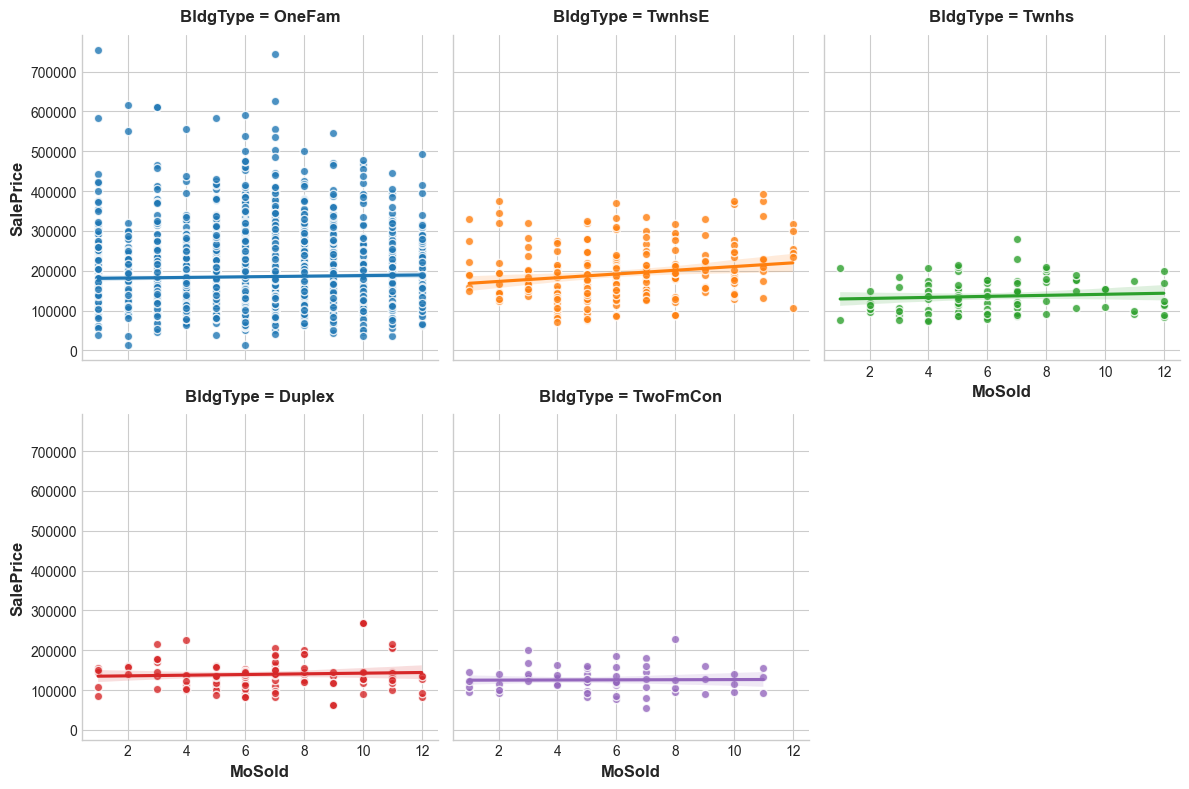

In [7]:
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)

這些圖表顯示了「建築類型」與其他特徵之間的互動效應。
- 在不同 BldgType 的類型下，GrLivArea 與 SalePrice 之間的關係都是相似且相關的。
- 但是，MoSold 與 SalePrice 之間的關係在不同 BldgType 的類型下有所關聯性都不高。

In [8]:
mi_scores.head(10)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
Name: MI Scores, dtype: float64